#  PS4_1

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

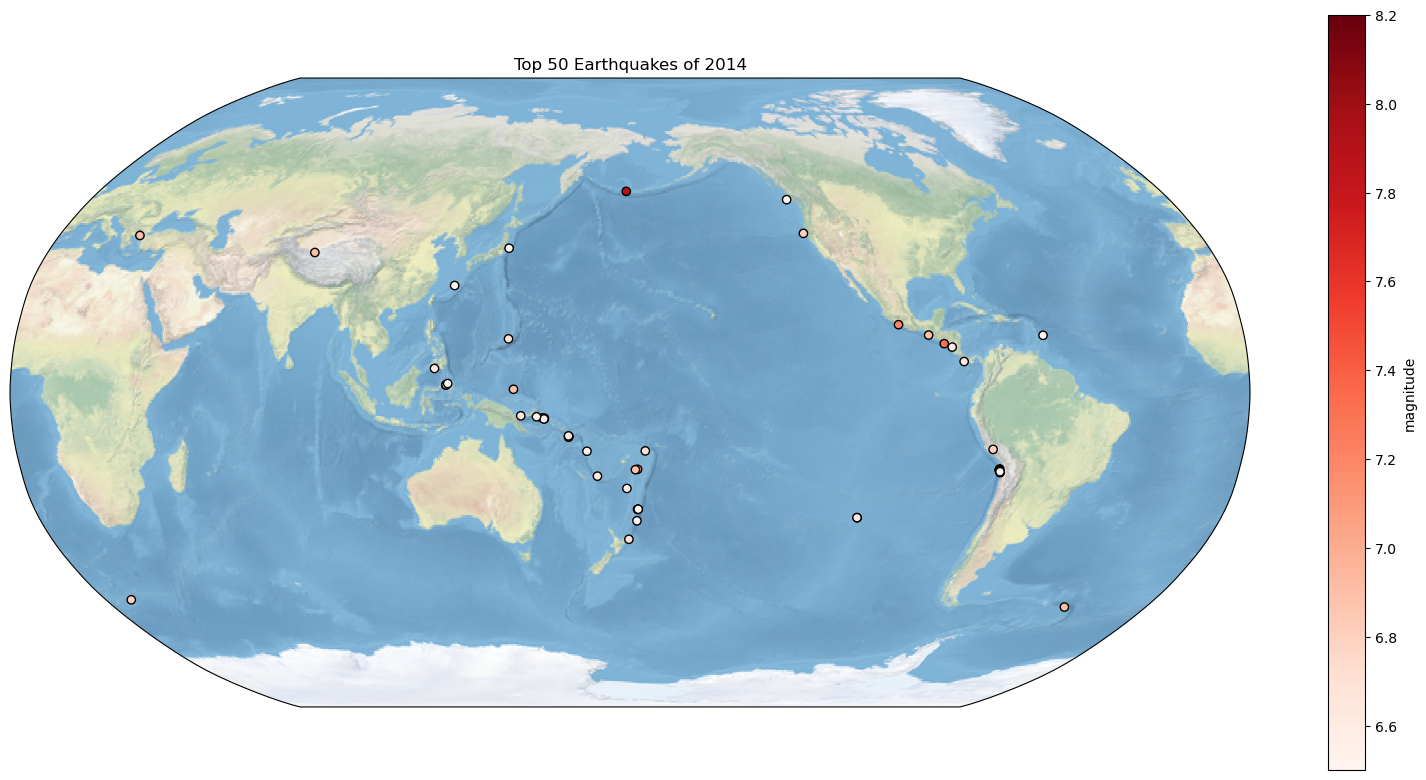

In [2]:
ds = pd.read_csv("usgs_earthquakes.csv")
top_50 = ds.sort_values("mag", ascending=False)[:50]

plt.figure(figsize=(20,20), dpi=100)
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)
ax.set_global()
ax.stock_img()

plt.scatter(top_50.longitude,top_50.latitude,c=top_50.mag,cmap='Reds',edgecolors='k',transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.5,label='magnitude')
plt.title('Top 50 Earthquakes of 2014')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5)#为什么不加这行输出结果会有text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

# PS4_2

## 4_2.1

#### 参考：https://zhajiman.github.io/post/cartopy_introduction/

In [3]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
%matplotlib inline

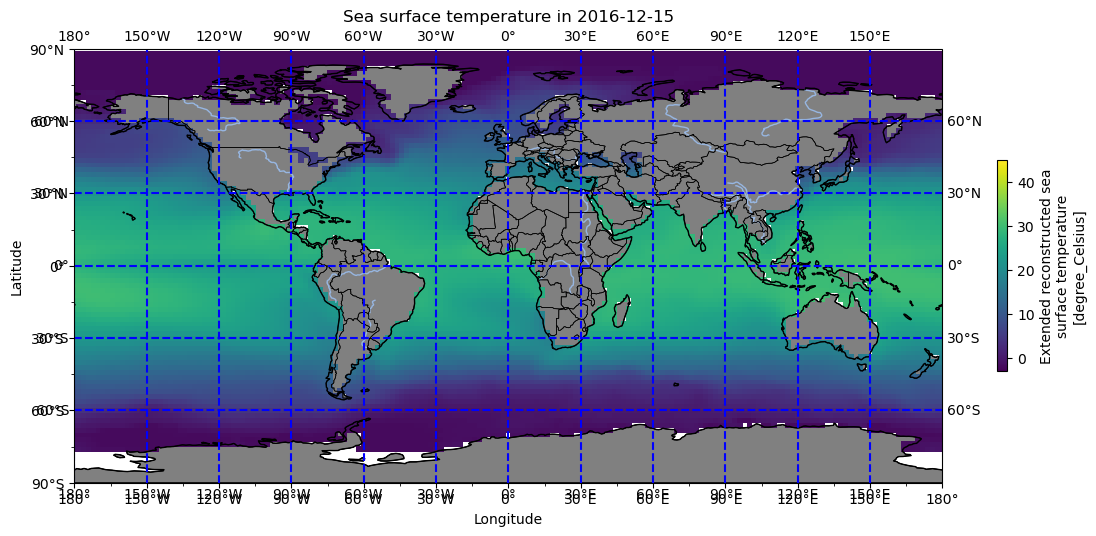

In [4]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

sst_latest = ds.sst.isel(time=-1)

proj = ccrs.PlateCarree() 
fig = plt.figure(figsize=(14,7),dpi=100)
ax = fig.add_subplot(1,1,1, projection= proj)
ax.coastlines() 
ax.set_global() 

tick_proj = ccrs.PlateCarree()
ax.set_xticks(np.arange(-180, 180 + 30, 30), crs=tick_proj)
ax.set_xticks(np.arange(-180, 180 + 15, 15), minor=True, crs=tick_proj)
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=tick_proj)
ax.set_yticks(np.arange(-90, 90 + 15, 15), minor=True, crs=tick_proj) 
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1.5, color='blue', linestyle='--')
gl.xlocator = mpl.ticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mpl.ticker.FixedLocator(np.arange(-90, 90, 30))

sst_latest.plot(ax=ax,transform=ccrs.PlateCarree(),
         vmin=-3.0, vmax=45.0, cbar_kwargs={'shrink': 0.4})
plt.title('Sea surface temperature in 2016-12-15')

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey',linewidths=0.5)
ax.add_feature(cfeature.RIVERS)

ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## 4_2.2

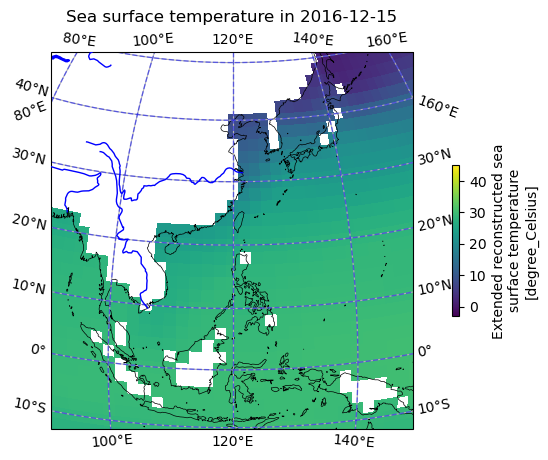

In [5]:
plt.figure(figsize=(10,5), dpi=100)

central_lon, central_lat = 120, 20 
proj = ccrs.Orthographic(central_lon, central_lat) 

ax = plt.axes(projection=proj)

extent = [central_lon-30, central_lon+30, central_lat-30, central_lat+30]
ax.set_extent(extent)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)
ax.coastlines(resolution='50m', linewidth=0.5)

ax.gridlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='blue',linestyle='--',alpha=0.5)

sst_latest.plot(ax=ax,transform=ccrs.PlateCarree(),
         vmin=-3.0, vmax=45.0, cbar_kwargs={'shrink': 0.4})

plt.title('Sea surface temperature in 2016-12-15')
plt.show()